### Exploring the Dictionary of Old English Corpus

Initial work on a parser of the SGML format using BeautifulSoup, followed by some descriptive analysis on the corpus

In [1]:
import re
import os
from bs4 import BeautifulSoup
from bs4 import NavigableString,Tag
import html5lib
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
path = '../../DOEC_complete/2488/sgml-corpus/'
f = open(path+'textlist.sgml')
list_lines = f.readlines()

In [29]:
text_list_dict = {'filename':[],"cameron_number":[],'short_title':[]}
for t in range(2,len(list_lines)):
    t_sp = list_lines[t].split('<!')
    fname = re.sub('[>|\"]','',t_sp[1]).split(' ')[3]
    t_sp2 = re.sub('--','',t_sp[2]).split(' ')
    cam_nr = t_sp2[1]
    title = " ".join(t_sp2[3:(len(t_sp2)-1)])
    text_list_dict['filename'].append(fname)
    text_list_dict['cameron_number'].append(cam_nr)
    text_list_dict['short_title'].append(title)    

In [30]:
def txt_type_fn(s):
    if s[0]=="A":
        return "Poetry"
    elif s[0]=="B":
        return "Prose"
    elif s[0]=="C":
        return "Interlinear Glosses"
    elif s[0]=="D":
        return "Glossaries"
    elif s[0]=="E":
        return "Runic Inscriptions"
    elif s[0]=="F":
        return "Inscriptions in the Latin Alphabet"

text_list = pd.DataFrame(text_list_dict)
text_list['text_type'] = text_list['cameron_number'].apply(txt_type_fn)
text_list.sample(10)

,cameron_number,filename,short_title,text_type
2116,B15.9.51,T21070.sgml,ChHead 815 (Birch 1155),Prose
2103,B15.9.38,T20940.sgml,ChHead 296 (Birch 449),Prose
246,B1.1.40.2,T02480.sgml,"&AE;CHom I, 38 (App)",Prose
2460,B27.3.15.2.2,T24530.sgml,MkMarg (Li),Prose
2736,C89.1,T27290.sgml,OccGl 89.1 (Schlutter),Interlinear Glosses
1203,B15.1.199,T11950.sgml,Ch IWm (Galbraith 2),Prose
1118,B15.1.112,T11090.sgml,Ch 1110 (Harm 62),Prose
92,A3.25,T00930.sgml,Res,Poetry
1443,B15.8.30,T14340.sgml,Ch 211 (Birch 514),Prose
385,B1.8.1,T03880.sgml,&AE;Let 1 (Wulfsige Xa),Prose


In [31]:
text_list.groupby('text_type')['cameron_number'].count()

text_type
Glossaries                             147
Inscriptions in the Latin Alphabet      61
Interlinear Glosses                    284
Poetry                                 202
Prose                                 2298
Runic Inscriptions                      45
Name: cameron_number, dtype: int64

In [336]:
text_list[text_list['filename']=='T00320.sgml']

,cameron_number,filename,short_title,text_type
31,A3.22.1,T00320.sgml,Rid 1,Poetry


In [337]:
file = path+'T00320.sgml'
raw = open(file).read()

In [338]:
soup = BeautifulSoup(raw,'html.parser')

In [339]:
print(soup)

<tei.2 id="T00320">
<teiheader>
<filedesc>
<titlestmt>
<title type="st">Rid 1</title>
<title type="ss">Rid 1</title></titlestmt>
<editionstmt><edition n="2"><date>January 2000</date></edition></editionstmt>
<extent>~2 KB, 4 citations</extent>
<publicationstmt><publisher>Dictionary of Old English</publisher>
<address><addrline>130 St. George St. Rm. 14285</addrline>
<addrline>University of Toronto</addrline>
<addrline>Toronto, Ontario</addrline>
<addrline>M5S 3H1</addrline>
<addrline>CANADA</addrline>
</address>
<idno>A3.22.1</idno>
<availability><p>
We ask that you not copy and/or (re)distribute the corpus without the written consent of the Dictionary of Old English.  The individual scholar must take responsibility for clearing copyright with the editors and publishers of the editions used in his/her own citations of the material.</p></availability></publicationstmt>
<sourcedesc><bibl>Riddles 1:<author n="Krapp and Dobbie 1936">Krapp and Dobbie 1936,</author>180 <edition><title>The Exe

In [340]:
title=soup.find('title',{'type':'st'}).get_text()
title

'Rid 1'

In [342]:
sentences = soup.findAll('s')
sentences[0].get_text()

' Hwylc is h&ae;le&t;a &t;&ae;s horsc ond &t;&ae;s hygecr&ae;ftig &t;&ae;t &t;&ae;t m&ae;ge asecgan, hwa mec on si&d; wr&ae;ce, &t;onne ic astige strong, stundum re&t;e, &t;rymful &t;unie, &t;ragum wr&ae;ce fere geond foldan, folcsalo b&ae;rne, r&ae;ced reafige?'

In [32]:
file2 = path+'T29200.sgml'
raw2 = open(file2).read()
soup2 = BeautifulSoup(raw2,'html.parser')

In [33]:
soup2.findAll('s')

[<s id="T29200000100" n="1"> <hi rend="rune">Gessus kristtus.</hi></s>,
 <s id="T29200000200" n="2"> <hi rend="rune">&amp;T;is <corr>sigbeacn</corr> setton hw&amp;ae;tred <corr>&amp;t;g&amp;ae;r</corr> <corr>awwo</corr> <corr>ft</corr> <corr>lcfrim</corr> &amp;ae; <corr>n</corr> <corr>gung</corr> <corr>cb</corr> <corr>ung</corr> <corr>gebid</corr> <corr>soo</corr>.</hi></s>,
 <s id="T29200000300" n="3"> <hi rend="rune"><corr>Ssus</corr>.</hi></s>,
 <s id="T29200000400" n="4"> <hi rend="rune">Kyniburug.</hi></s>,
 <s id="T29200000500" n="5"> <hi rend="rune">Ric&amp;ae;s dryhtn&amp;ae;s.</hi></s>]

In [46]:
class DOEC_text(object):
    def __init__(self,path): 
        self.path=path
        self.title=''
        self.sentences=[]
        self.split_sentences=[]
        
    def special_char_convert(self,sent):
        char_lookup = {
            '&AE;':'Æ','&D;':'Ð','&T;':'Þ' ,'&ae;':'æ' ,'&amacron;':'a'  
            ,'&amp;':'&' ,'&bbar;':'b','&cmacron;':'c','&d;':'ð' ,'&e;':'e'
            ,'&emacron;':'e','&imacron;':'i','&lbar;':'l','&nmacron;':'n'
            ,'&oe;':'œ','&omacron;':'o'  ,'&pmacron;':'p'  ,'&qmacron;':'q'  
            ,'&rmacron;':'r' ,'&t;':'þ' ,'&tbar;':'þ','&Alpha;':'A','&Eta;':'E'
            ,'&Lambda;':'Λ','&Nu;':'N','&Omega;':'Ω','&Omicron;':'O','&Rho;':'P'
            ,'&Tau;':'T','&omega;':'ω'
        }
        for spec_char in char_lookup.keys():
            sent=re.sub(spec_char,char_lookup[spec_char],sent)
        return sent        
        
    def read_file(self,foreign_words='remove'):
        raw = open(self.path).read()
        soup = BeautifulSoup(raw,'html.parser')
        self.title = soup.find('title',{'type':'st'}).get_text()
        tagged_sentences = soup.findAll('s')
        for s in tagged_sentences:            
            if foreign_words=='remove':
                foreign = s.findAll('foreign')
                for f in foreign:
                    f.extract()
            s = s.get_text().strip()        
            s = self.special_char_convert(s).lower()
            self.sentences.append(s)
        return self
    
    def sentence_splitter(self,punctuation=False):
        for s in self.sentences:
            if punctuation:
                # separate punctuation
                s=re.sub('(?<=\w)([,.&;:?\"!\-\(\)\'])', r' \1', s)
            else:
                s = re.sub('[^a-zæþð ]','',s)
            self.split_sentences.append([s.split(' ')])

In [47]:
rune = DOEC_text(path+'T29200.sgml').read_file()

In [64]:
rune.title

'RuneBewcastle'

In [48]:
rune.sentences

['gessus kristtus.',
 'þis sigbeacn setton hwætred þgær awwo ft lcfrim æ n gung cb ung gebid soo.',
 'ssus.',
 'kyniburug.',
 'ricæs dryhtnæs.']

In [52]:
rune.sentence_splitter(punctuation=True)
print(rune.split_sentences)

[[['gessus', 'kristtus']], [['þis', 'sigbeacn', 'setton', 'hwætred', 'þgær', 'awwo', 'ft', 'lcfrim', 'æ', 'n', 'gung', 'cb', 'ung', 'gebid', 'soo']], [['ssus']], [['kyniburug']], [['ricæs', 'dryhtnæs']], [['gessus', 'kristtus']], [['þis', 'sigbeacn', 'setton', 'hwætred', 'þgær', 'awwo', 'ft', 'lcfrim', 'æ', 'n', 'gung', 'cb', 'ung', 'gebid', 'soo']], [['ssus']], [['kyniburug']], [['ricæs', 'dryhtnæs']], [['gessus', 'kristtus']], [['þis', 'sigbeacn', 'setton', 'hwætred', 'þgær', 'awwo', 'ft', 'lcfrim', 'æ', 'n', 'gung', 'cb', 'ung', 'gebid', 'soo']], [['ssus']], [['kyniburug']], [['ricæs', 'dryhtnæs']], [['gessus', 'kristtus', '.']], [['þis', 'sigbeacn', 'setton', 'hwætred', 'þgær', 'awwo', 'ft', 'lcfrim', 'æ', 'n', 'gung', 'cb', 'ung', 'gebid', 'soo', '.']], [['ssus', '.']], [['kyniburug', '.']], [['ricæs', 'dryhtnæs', '.']]]


In [260]:
t='ricæs dryhtnæs.'
t = t.sub()
t.split(' ')

['ricæs', 'dryhtnæs.']

In [166]:
sent = sentences[5].get_text().strip()
#print(sent)
print(special_char_convert(sent))

Beorht wæron burgræced, burnsele monige, heah horngestreon, heresweg micel, meodoheall monig M dreama full, oþþæt þæt onwende wyrd seo swiþe.


In [53]:
file3 = path+'T26320.sgml'
raw3 = open(file3).read()
soup3 = BeautifulSoup(raw3,'html.parser')
soup3.findAll('s')

[<s id="T26320000100" n="1"> <foreign>ignitis</foreign> of.</s>,
 <s id="T26320000200" n="2"> <foreign>arridet</foreign> ongrynt o&amp;d;&amp;d;e ongrata&amp;d;.</s>,
 <s id="T26320000300" n="3"> <foreign>uertigine</foreign> swing.</s>]

In [54]:
s = soup3.findAll('s')[1]
s

<s id="T26320000200" n="2"> <foreign>arridet</foreign> ongrynt o&amp;d;&amp;d;e ongrata&amp;d;.</s>

In [55]:
foreign = s.findAll('foreign')
foreign

[<foreign>arridet</foreign>]

In [56]:
for f in foreign:
    f.extract()
print(s.get_text().strip())

ongrynt o&d;&d;e ongrata&d;.


In [61]:
# all poems and prose works- exclude incriptions and glosses
#texts = text_list[text_list['text_type'].isin(['Poetry','Prose'])]['filename'].tolist()
texts = text_list['filename'].tolist()
text_types = text_list['text_type'].tolist()
len(texts)

3037

In [67]:
token_dict = {}
token_set = set()
char_dict = {}
char_set = set()
text_dict = {"title":[],"sentences":[],"words":[],"type":[]}

for i in range(len(texts)):
    text_t = DOEC_text(path+texts[i]).read_file()
    sent_count = 0
    word_count = 0
    for s in text_t.sentences:
        sent_count += 1
        for t in s.split(' '):        
            for c in t:
                if c in char_set:
                    char_dict[c] += 1                
                else:
                    char_dict[c] = 1
                    char_set.add(c)
            t = re.sub('[^a-zæþð]','',t).strip()
            if t != '':
                word_count+=1
                if t in token_set:
                    token_dict[t] += 1
                else:
                    token_dict[t] = 1
                    token_set.add(t)
    text_dict['title'].append(text_t.title)
    text_dict["sentences"].append(sent_count)
    text_dict["words"].append(word_count)
    text_dict["type"].append(text_types[i])
    

In [72]:
text_metadata = pd.DataFrame(text_dict)
text_metadata = text_metadata.sort_values('words',ascending=False).reset_index(drop=True)
text_metadata.head()

,sentences,title,type,words
0,2565,CP,Prose,65329
1,1940,Bo,Prose,45269
2,2088,ChronE (Plummer),Prose,42693
3,2447,PsGlI (Lindelöf),Interlinear Glosses,34656
4,2115,LibSc,Interlinear Glosses,33771


In [71]:
text_metadata.groupby('type')['sentences','words'].sum().sort_values('words',ascending=False)

,sentences,words
type,,
Prose,97900,2036489
Interlinear Glosses,65239,658802
Poetry,9106,177479
Glossaries,29844,26387
Runic Inscriptions,76,341
Inscriptions in the Latin Alphabet,86,305


In [350]:
token_count = pd.DataFrame.from_dict(token_dict,orient='index').reset_index()
token_count.columns = ['token','freq']
token_count = token_count.sort_values('freq',ascending=False).reset_index(drop=True)
token_count['pct_of_corpus'] = token_count['freq']/sum(token_count['freq'])
token_count.head(15)

,token,freq,pct_of_corpus
0,on,61906,0.027962
1,and,51832,0.023411
2,þæt,49287,0.022262
3,he,43021,0.019432
4,þa,41498,0.018744
5,to,41451,0.018722
6,þe,32039,0.014471
7,his,25809,0.011657
8,se,25538,0.011535
9,mid,23944,0.010815


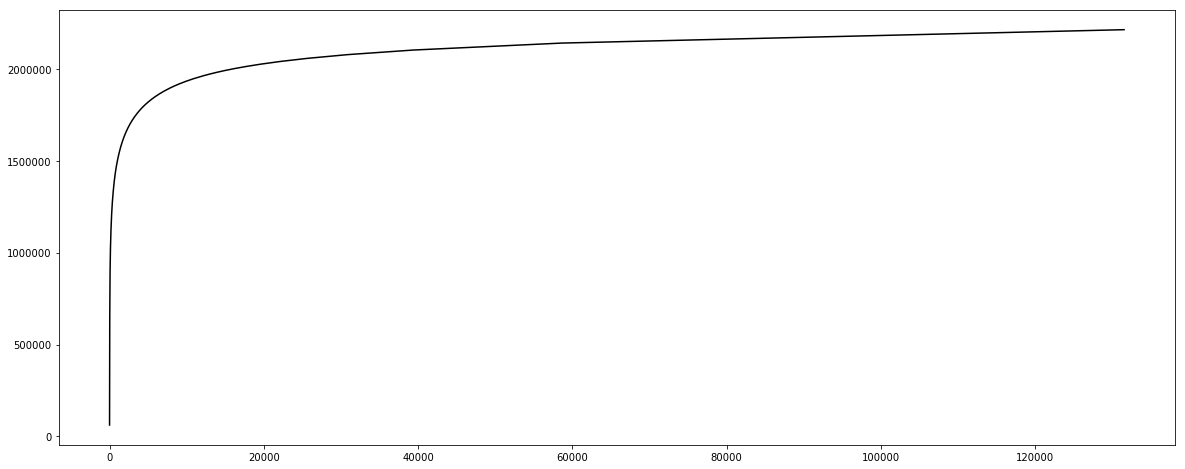

In [335]:
plt.figure(figsize=(20,8))
plt.plot(np.cumsum(token_count['freq']),'k-')

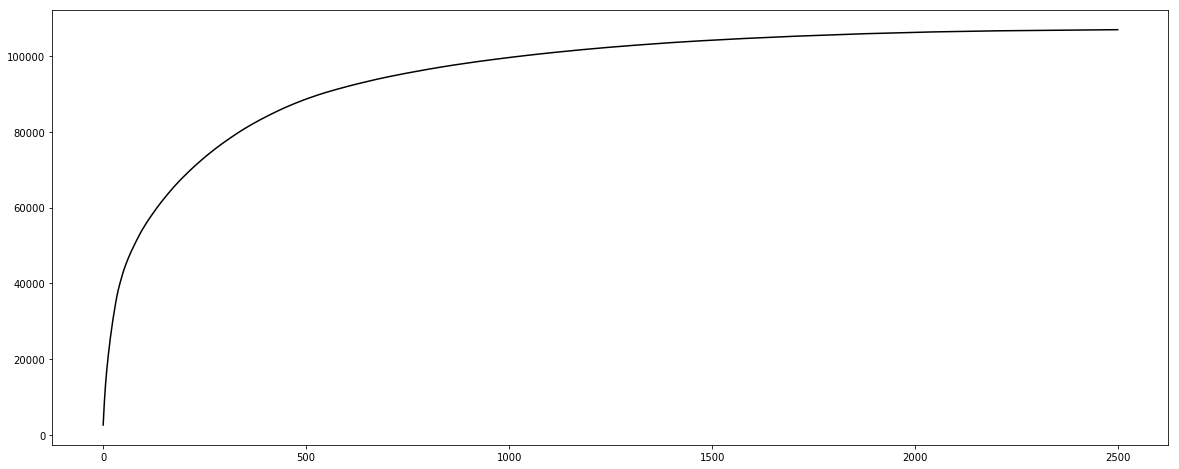

In [334]:
plt.figure(figsize=(20,8))
plt.plot(np.cumsum(sent_count['freq']),'k-')

In [325]:
print("number of texts:",sent_count.shape[0])
print("total sentences:",sum(sent_count['freq']))
print("total tokens:",sum(token_count['freq']))
print("unique tokens:",token_count.shape[0])
print("pct of tokens seen only once:",token_count[token_count['freq']==1].shape[0]/token_count.shape[0])

number of texts: 2500
total sentences: 107006
total tokens: 2213968
unique tokens: 131505
pct of tokens seen only once: 0.558754419984031


In [318]:
char_count = pd.DataFrame.from_dict(char_dict,orient='index').reset_index()
char_count.columns = ['char','freq']
char_count = char_count.sort_values('freq',ascending=False).reset_index(drop=True)
print(char_count)

   char     freq
0     e  1427556
1     n   912942
2     a   811677
3     o   622847
4     s   570640
5     i   527899
6     r   510941
7     d   458272
8     t   419973
9     l   390791
10    h   368742
11    g   356943
12    m   352195
13    þ   314143
14    æ   301545
15    w   290607
16    c   283551
17    u   269915
18    f   252574
19    ð   227981
20    y   170114
21    ,   153438
22    b   140823
23    .   121079
24    &    75827
25    p    51099
26    ;    17468
27    :    10645
28    x     9458
29    k     3193
30    ?     3180
31    v     1724
32    z      640
33    q      357
34    "      186
35    j      176
36    -       62
37    (       62
38    )       62
39    '       46
40    !       15
41    1        2
42    2        2
43    œ        1
